# 分组与聚合

* GroupBy对象

In [1]:
import pandas as pd
import numpy as np

In [2]:
 df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                            'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.269053,1.158410
1,bar,one,-0.677528,-0.556386
2,foo,two,-0.065155,-1.044849
3,bar,three,2.189527,-0.492679
4,foo,two,-0.810659,0.904978
5,bar,two,-0.752076,-1.285067
6,foo,one,1.224341,-0.472814
7,foo,three,-0.659085,1.281460


In [16]:
df.groupby('A',as_index=True).sum().index

Index(['bar', 'foo'], dtype='object', name='A')

In [15]:
df.groupby('A',as_index=False).sum().index

Int64Index([0, 1], dtype='int64')

In [4]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.106578,0.003304
foo,-0.370050,0.113288


In [5]:
df.groupby('A').sum().shape


(2, 2)

In [6]:
df.groupby('A').size()

A
bar    3
foo    5
dtype: int64

In [8]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.984471 -0.043672
    three -1.429510  1.017294
    two   -0.692597 -0.970318
foo one    1.348252  0.953936
    three -1.678742 -0.110585
    two   -0.039560 -0.730062

In [9]:
df.groupby(['A','B']).size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [10]:
# 按自定义key分组，列表
self_def_key = [1, 1, 2, 2, 2, 1, 1, 1]
df.groupby(self_def_key).mean()

,C,D
1,-0.401512,-0.034128
2,-0.489690,0.095744


In [71]:
# 按自定义key分组，多层列表
df.groupby([df['A'], df['B']]).size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

In [12]:
df.groupby([df['A'], df['B']]).mean()

C         D
A   B                        
bar one   -0.984471 -0.043672
    three -1.429510  1.017294
    two   -0.692597 -0.970318
foo one    0.674126  0.476968
    three -1.678742 -0.110585
    two   -0.019780 -0.365031

In [13]:
df.groupby([df['A'], df['B']]).mean().unstack()

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar -0.984471 -1.429510 -0.692597 -0.043672  1.017294 -0.970318
foo  0.674126 -1.678742 -0.019780  0.476968 -0.110585 -0.365031

* GroupBy对象分组迭代  
groupBy对象是一个可迭代的对象

In [14]:
# 单层分组
grouped1 = df.groupby('A')
for group_name, group_data in grouped1:
    print('---',group_name)
    print('***',group_data)

--- bar
***      A      B         C         D
1  bar    one -0.984471 -0.043672
3  bar  three -1.429510  1.017294
5  bar    two -0.692597 -0.970318
--- foo
***      A      B         C         D
0  foo    one  0.058964 -0.730069
2  foo    two -0.556552 -0.380698
4  foo    two  0.516992 -0.349364
6  foo    one  1.289288  1.684004
7  foo  three -1.678742 -0.110585


In [15]:
# 多层分组
grouped2 = df.groupby(['A', 'B'])
for group_name, group_data in grouped2:
    print('---',group_name)
    print('***',group_data)

--- ('bar', 'one')
***      A    B         C         D
1  bar  one -0.984471 -0.043672
--- ('bar', 'three')
***      A      B        C         D
3  bar  three -1.42951  1.017294
--- ('bar', 'two')
***      A    B         C         D
5  bar  two -0.692597 -0.970318
--- ('foo', 'one')
***      A    B         C         D
0  foo  one  0.058964 -0.730069
6  foo  one  1.289288  1.684004
--- ('foo', 'three')
***      A      B         C         D
7  foo  three -1.678742 -0.110585
--- ('foo', 'two')
***      A    B         C         D
2  foo  two -0.556552 -0.380698
4  foo  two  0.516992 -0.349364


In [76]:
# GroupBy对象转换list，凡是可迭代对象都可以转换成列表
list(grouped1)

[('bar',      A      B         C         D
  1  bar    one -0.173749 -0.877247
  3  bar  three  0.576542  1.297003
  5  bar    two -1.019661  0.036177), ('foo',      A      B         C         D
  0  foo    one  0.742728  0.466063
  2  foo    two -0.351989  0.489152
  4  foo    two -0.164548 -0.449049
  6  foo    one  0.400755 -0.561433
  7  foo  three  0.687298  0.349950)]

In [77]:
# GroupBy对象转换dict
dict(list(grouped1))

{'bar':      A      B         C         D
 1  bar    one -0.173749 -0.877247
 3  bar  three  0.576542  1.297003
 5  bar    two -1.019661  0.036177, 'foo':      A      B         C         D
 0  foo    one  0.742728  0.466063
 2  foo    two -0.351989  0.489152
 4  foo    two -0.164548 -0.449049
 6  foo    one  0.400755 -0.561433
 7  foo  three  0.687298  0.349950}

In [78]:
# 按列分组
print(df.dtypes)

# 按数据类型分组
print(df.groupby(df.dtypes, axis=1).size())
df.groupby(df.dtypes, axis=1).sum()

A     object
B     object
C    float64
D    float64
dtype: object
float64    2
object     2
dtype: int64


,float64,object
0,1.208791,fooone
1,-1.050996,barone
2,0.137163,footwo
3,1.873545,barthree
4,-0.613597,footwo
5,-0.983484,bartwo
6,-0.160677,fooone
7,1.037247,foothree


* 其他分组方法

In [79]:
df2 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['A', 'B', 'C', 'D', 'E'])
df2.iloc[1, 1:4] = np.NaN
df2

,a,b,c,d,e
A,7,1.0,4.0,1.0,1
B,3,NaN,NaN,NaN,3
C,2,1.0,5.0,1.0,7
D,4,2.0,6.0,8.0,4
E,1,8.0,7.0,9.0,3


In [80]:
# 通过字典分组
mapping_dict = {'a':'python', 'b':'python', 'c':'java', 'd':'C', 'e':'java'}
print(df2.groupby(mapping_dict, axis=1).size())
print(df2.groupby(mapping_dict, axis=1).count()) # 非NaN的个数
df2.groupby(mapping_dict, axis=1).sum()

C         1
java      2
python    2
dtype: int64
   C  java  python
A  1     2       2
B  0     1       1
C  1     2       2
D  1     2       2
E  1     2       2


,C,java,python
A,1.0,5.0,8.0
B,NaN,3.0,3.0
C,1.0,12.0,3.0
D,8.0,10.0,6.0
E,9.0,10.0,9.0


In [18]:
# 通过函数分组
df3 = pd.DataFrame(np.random.randint(1, 10, (5,5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['AA', 'BBB', 'CC', 'D', 'EE'])
print(df3)

def group_key(idx):
    """
        idx 为列索引或行索引
    """
    #return idx
    return len(idx)

list(df3.groupby(group_key))

# 以上自定义函数等价于
df3.groupby(len).size()

     a  b  c  d  e
AA   6  8  3  4  3
BBB  7  7  2  5  5
CC   5  4  5  4  1
D    2  7  6  6  1
EE   1  3  9  8  9


1    1
2    3
3    1
dtype: int64

In [20]:
# 通过索引级别分组
columns = pd.MultiIndex.from_arrays([['Python', 'Java', 'Python', 'Java', 'Python'],
                                     ['A', 'A', 'B', 'C', 'B']], names=['language', 'index'])
df4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=columns)
df4

language,Python,Java,Python,Java,Python
index,A,A,B,C,B
0,7,3,3,3,8
1,5,4,3,4,9
2,1,2,2,5,6
3,2,3,3,1,4
4,7,2,8,9,1


In [22]:
# 根据language进行分组
df4.groupby(level='language', axis=1).sum()
# df4.groupby(level='index', axis=1).sum()

language,Java,Python
0,6,18
1,8,17
2,7,9
3,4,9
4,11,16


* 聚合

In [23]:
df

,A,B,C,D
0,foo,one,0.058964,-0.730069
1,bar,one,-0.984471,-0.043672
2,foo,two,-0.556552,-0.380698
3,bar,three,-1.429510,1.017294
4,foo,two,0.516992,-0.349364
5,bar,two,-0.692597,-0.970318
6,foo,one,1.289288,1.684004
7,foo,three,-1.678742,-0.110585


In [25]:
# 内置的聚合函数

df.groupby('A').describe().T

A             bar       foo
C count  3.000000  5.000000
  mean  -1.035526 -0.074010
  std    0.371100  1.121780
  min   -1.429510 -1.678742
  25%   -1.206991 -0.556552
  50%   -0.984471  0.058964
  75%   -0.838534  0.516992
  max   -0.692597  1.289288
D count  3.000000  5.000000
  mean   0.001101  0.022658
  std    0.994562  0.954662
  min   -0.970318 -0.730069
  25%   -0.506995 -0.380698
  50%   -0.043672 -0.349364
  75%    0.486811 -0.110585
  max    1.017294  1.684004

In [26]:
# 自定义聚合函数
def peak_range(df):
    """
        返回数值范围
    """
    #print type(df) #参数为索引所对应的记录
    return df.max() - df.min()

print(df.groupby('A').agg(peak_range))
print(df.groupby('A').agg(lambda df : df.max() - df.min()))

            C         D
A                      
bar  0.736913  1.987611
foo  2.968030  2.414073
            C         D
A                      
bar  0.736913  1.987611
foo  2.968030  2.414073


In [89]:
# 应用多个聚合函数

# 同时应用多个聚合函数
df.groupby('A').agg(['mean', 'std', 'count', peak_range]) # 默认列名为函数名

C                                    D                           
         mean       std count peak_range      mean       std count peak_range
A                                                                            
bar -0.205623  0.798578     3   1.596202  0.151978  1.091741     3   2.174250
foo  0.262849  0.497532     5   1.094717  0.058937  0.519238     5   1.050585

In [27]:
df.groupby('A').agg(['mean', 'std', 'count', ('range', peak_range)]) # 通过元组提供新的列名

C                                  D                          
         mean      std count     range      mean       std count     range
A                                                                         
bar -1.035526  0.37110     3  0.736913  0.001101  0.994562     3  1.987611
foo -0.074010  1.12178     5  2.968030  0.022658  0.954662     5  2.414073

In [91]:
# 每列作用不同的聚合函数
dict_mapping = {'C':'mean',
                'D':'sum'}
df.groupby('A').agg(dict_mapping)

,C,D
A,,
bar,-0.205623,0.455934
foo,0.262849,0.294683


In [92]:
dict_mapping = {'C':['mean','max'],
                'D':'sum'}
df.groupby('A').agg(dict_mapping)

C                   D
         mean       max       sum
A                                
bar -0.205623  0.576542  0.455934
foo  0.262849  0.742728  0.294683

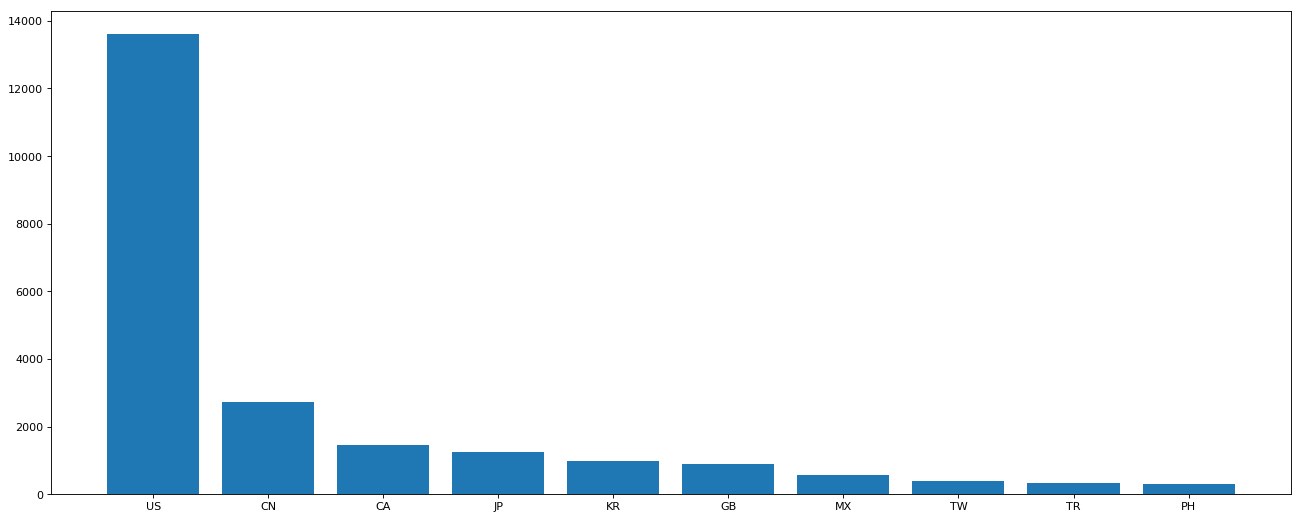

In [1]:
# coding=utf-8
import pandas as pd
from matplotlib import pyplot as plt

file_path = "./starbucks_store_worldwide.csv"

df = pd.read_csv(file_path)

#使用matplotlib呈现出店铺总数排名前10的国家
#准备数据
data1 = df.groupby(by="Country").count()["Brand"].sort_values(ascending=False)[:10]

_x = data1.index
_y = data1.values

#画图
plt.figure(figsize=(20,8),dpi=80)

plt.bar(range(len(_x)),_y)

plt.xticks(range(len(_x)),_x)

plt.show()